In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import tools.clusterfit as cf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # shut up, seaborn
plt.style.use('./nice.mplstyle')
scan_bf = pd.read_csv('./data/fits/legacy/scan_YSZ-T_θ75.csv')
scan_bf

,Glon,Glat,A,B,TotalScatter,n_sigma
0,-180.0,-90.0,2.065561,2.758,0.072,0.000000
1,-180.0,-88.0,2.065561,2.758,0.072,-0.790728
2,-180.0,-86.0,2.056071,2.752,0.070,-1.111144
3,-180.0,-84.0,2.056071,2.752,0.070,-0.957032
4,-180.0,-82.0,2.056071,2.752,0.070,-1.192557
...,...,...,...,...,...,...
8095,176.0,80.0,2.143078,2.748,0.080,0.516761
8096,176.0,82.0,2.143078,2.748,0.080,0.707107
8097,176.0,84.0,2.143078,2.750,0.080,0.638511
8098,176.0,86.0,2.152970,2.758,0.080,0.731873


In [2]:
scan_bf['n_sigma'].idxmax(), scan_bf['n_sigma'].idxmin()

(2752, 6788)

In [3]:
scan_bf.iloc[2752], scan_bf.iloc[6788]

(Glon           -60.000000
 Glat            14.000000
 A                2.460583
 B                2.892000
 TotalScatter     0.080000
 n_sigma          5.600521
 Name: 2752, dtype: float64,
 Glon            120.000000
 Glat            -14.000000
 A                 1.954511
 B                 2.678000
 TotalScatter      0.060000
 n_sigma          -5.600521
 Name: 6788, dtype: float64)

In [4]:
samples = pd.read_csv('./data/samples-lightcone0-clean.csv')
dtheta = cf.angular_separation(samples['phi_on_lc'], samples['theta_on_lc'], -60, 14)

In [5]:
p_dipoles = samples[:260][dtheta[:260] < 75]
n_dipoles = samples[:260][dtheta[:260] > 105]

# 1 Check histogram of some properties
T, z, fraction, flux

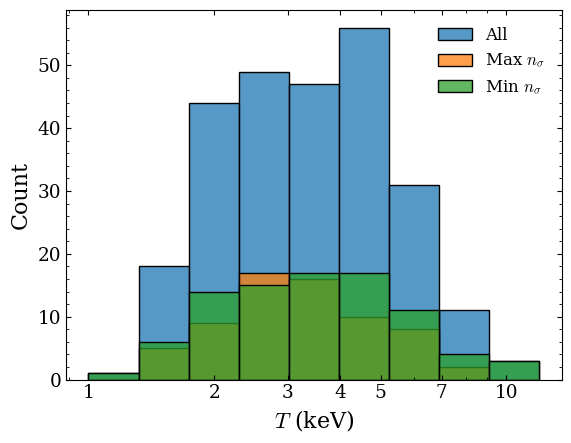

In [6]:
bins = np.linspace(np.log10(1), np.log10(12), 10)
sns.histplot(samples[cf.COLUMNS['T']][:260], bins=bins, label='All', log_scale=True)
sns.histplot(p_dipoles[cf.COLUMNS['T']], bins=bins, label='Max $n_\\sigma$', log_scale=True)
sns.histplot(n_dipoles[cf.COLUMNS['T']], bins=bins, label='Min $n_\\sigma$', log_scale=True)
plt.xlabel('$T$ (keV)')
plt.xticks(ticks=[1, 2, 3, 4, 5, 7, 10],
    labels=['1','2','3','4','5','7','10'])
plt.legend()
plt.show()

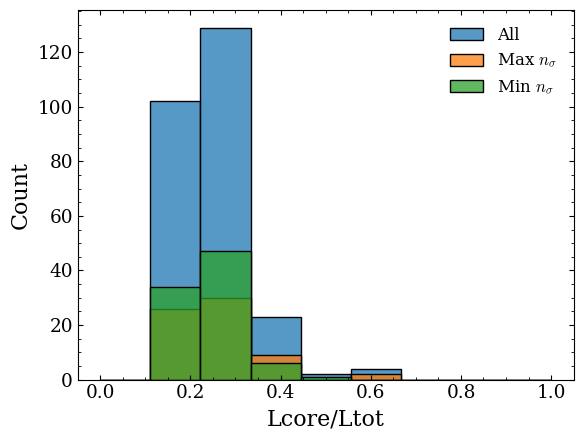

In [7]:
bins = np.linspace(0, 1, 10)
sns.histplot(samples['Lcore/Ltot'][:260], bins=bins, label='All')
sns.histplot(p_dipoles['Lcore/Ltot'], bins=bins, label='Max $n_\\sigma$')
sns.histplot(n_dipoles['Lcore/Ltot'], bins=bins, label='Min $n_\\sigma$')
plt.legend()
plt.show()

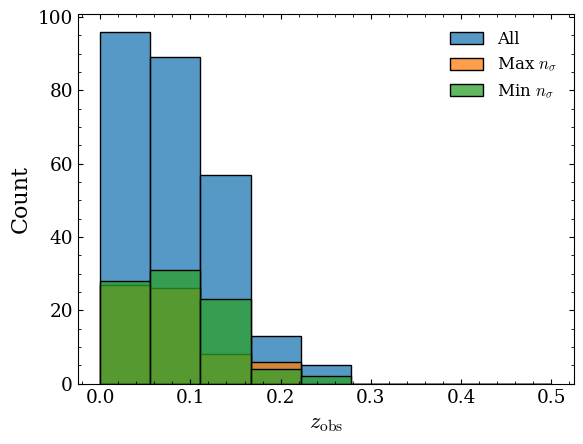

In [8]:
bins = np.linspace(0, 0.5, 10)
sns.histplot(samples['ObservedRedshift'][:260], bins=bins, label='All')
sns.histplot(p_dipoles['ObservedRedshift'], bins=bins, label='Max $n_\\sigma$')
sns.histplot(n_dipoles['ObservedRedshift'], bins=bins, label='Min $n_\\sigma$')
plt.xlabel('$z_\\mathrm{{obs}}$')
plt.legend()
plt.show()

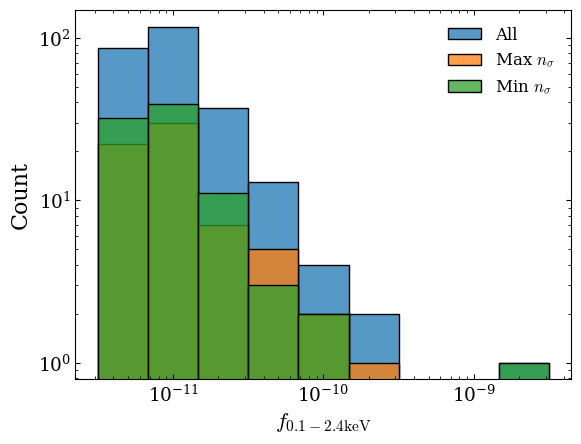

In [9]:
bins = np.linspace(-11.5, -8.5, 10)
sns.histplot(samples['Flux'][:260], bins=bins, label='All', log_scale=[True, True])
sns.histplot(p_dipoles['Flux'], bins=bins, label='Max $n_\\sigma$', log_scale=[True, True])
sns.histplot(n_dipoles['Flux'], bins=bins, label='Min $n_\\sigma$', log_scale=[True, True])
plt.xlabel('$f_{{0.1-2.4\\mathrm{{keV}}}}$')
plt.legend()
plt.show()

# 2 Plot the scaling relations

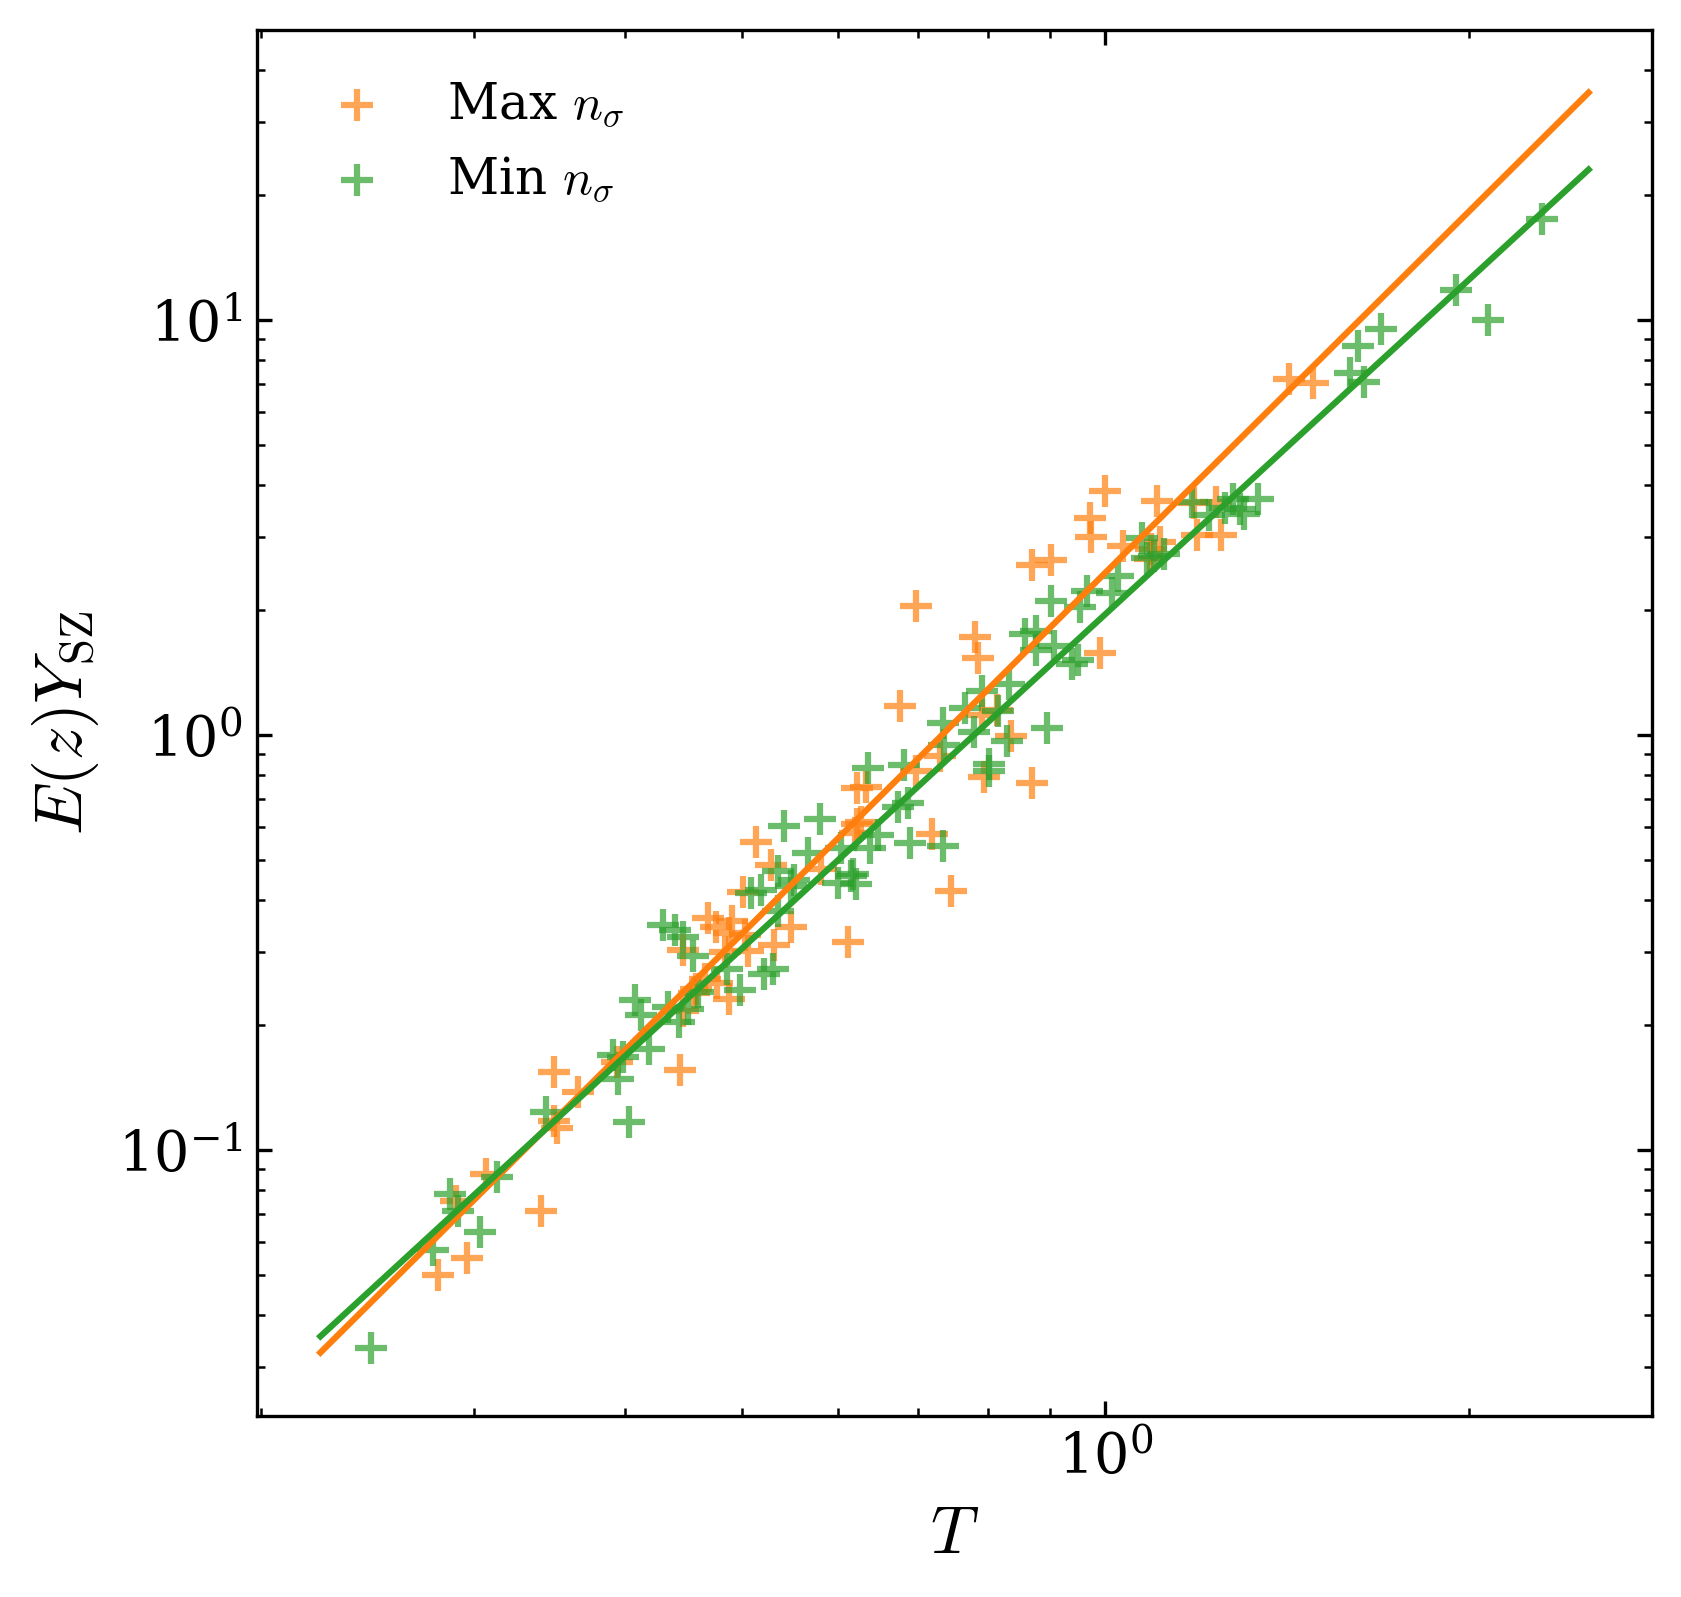

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=300)

all_logX_ = np.log10(samples[cf.COLUMNS['T']][:260] / 5)
p_dipoles_logX_ = np.log10(p_dipoles[cf.COLUMNS['T']] / 5)
n_dipoles_logX_ = np.log10(n_dipoles[cf.COLUMNS['T']] / 5)
Ez = cf.E(samples['ObservedRedshift'][:260])
all_logY_ = np.log10(samples[cf.COLUMNS['YSZ']][:260] / 35 * Ez**1)
Ez = cf.E(p_dipoles['ObservedRedshift'])
p_dipoles_logY_ = np.log10(p_dipoles[cf.COLUMNS['YSZ']] / 35 * Ez**1)
Ez = cf.E(n_dipoles['ObservedRedshift'])
n_dipoles_logY_ = np.log10(n_dipoles[cf.COLUMNS['YSZ']] / 35 * Ez**1)

# inverse_weight = np.cos(np.deg2rad(dtheta[:260][dtheta[:260] < 75]))

plt.scatter(10**p_dipoles_logX_, 10**p_dipoles_logY_, alpha=0.7, s=60, marker='+', label='Max $n_\\sigma$', color='tab:orange')
plt.scatter(10**n_dipoles_logX_, 10**n_dipoles_logY_, alpha=0.7, s=60, marker='+', label='Min $n_\\sigma$', color='tab:green')

# # Ugly hack to plot clusters not in the dipoles
# pair1 = np.column_stack((all_logX_, all_logY_))
# pair2 = np.column_stack((p_dipoles_logX_, p_dipoles_logY_))
# pair3 = np.column_stack((n_dipoles_logX_, n_dipoles_logY_))
# else_mask = np.array([pair not in pair2 for pair in pair1]) * np.array([pair not in pair3 for pair in pair1])
# plt.scatter(10**all_logX_[else_mask], 10**all_logY_[else_mask], alpha=0.7, s=7, label='Others')

# plt.errorbar(10**p_dipoles_logX_, 10**p_dipoles_logY_, yerr=inverse_weight*0.09, fmt='.')

logT_ = np.linspace(-0.65, 0.4, 100)
logYSZ_1 = np.log10(scan_bf['A'][2752]) + scan_bf['B'][2752] * logT_
plt.plot(10**logT_, 10**logYSZ_1, color='tab:orange')

logYSZ_2 = np.log10(scan_bf['A'][6788]) + scan_bf['B'][6788] * logT_
plt.plot(10**logT_, 10**logYSZ_2, color='tab:green')

# logYSZ_ = 0.330 + 2.756 * logT_
# plt.plot(10**logT_, 10**logYSZ_, color='k', label='All')

plt.ylabel('$E(z)Y_\\mathrm{{SZ}}$')
plt.xlabel('$T$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# The A and B distribution

In [11]:
scan_bt = pd.read_csv('./data/fits/legacy/scan_btstrp_YSZ-T_θ75.csv')
p_dipole_bt = scan_bt.loc[(scan_bt['Glon'] == -60) & (scan_bt['Glat'] == 14)]
n_dipole_bt = scan_bt.loc[(scan_bt['Glon'] == 120) & (scan_bt['Glat'] == -14)]

In [12]:
all_bt = pd.read_csv('./data/fits/legacy/bootstrap_YSZ-T.csv')

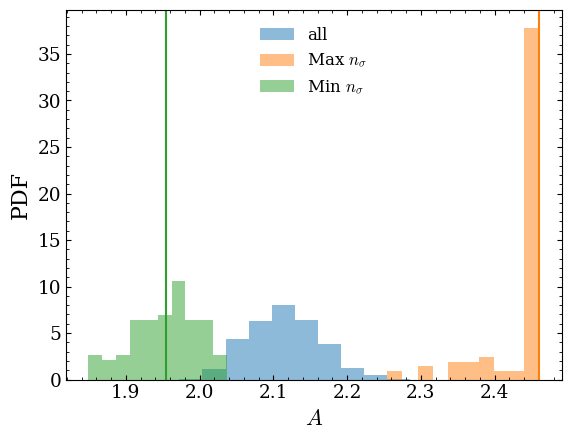

In [13]:
plt.hist(all_bt['A'], alpha=0.5, bins=10, label='all', density=True)
plt.hist(p_dipole_bt['A'], alpha=0.5, bins=10, label='Max $n_\\sigma$', density=True)
plt.hist(n_dipole_bt['A'], alpha=0.5, bins=10, label='Min $n_\\sigma$', density=True)

plt.axvline(scan_bf['A'][2752], color='tab:orange')
plt.axvline(scan_bf['A'][6788], color='tab:green')
plt.xlabel('$A$')
plt.ylabel('PDF')
plt.legend()
plt.show()

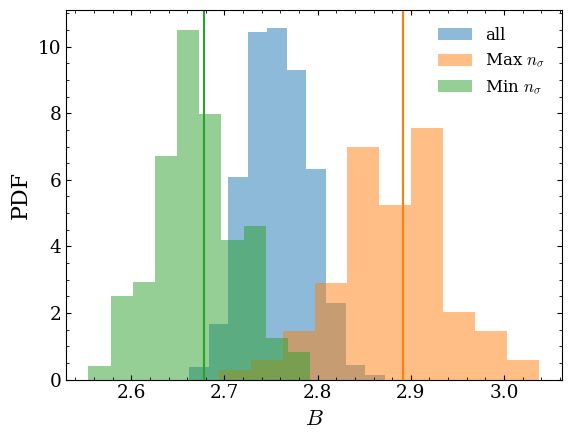

In [14]:
plt.hist(all_bt['B'], alpha=0.5, bins=10, label='all', density=True)
plt.hist(p_dipole_bt['B'], alpha=0.5, bins=10, label='Max $n_\\sigma$', density=True)
plt.hist(n_dipole_bt['B'], alpha=0.5, bins=10, label='Min $n_\\sigma$', density=True)

plt.axvline(scan_bf['B'][2752], color='tab:orange')
plt.axvline(scan_bf['B'][6788], color='tab:green')
plt.xlabel('$B$')
plt.ylabel('PDF')
plt.legend()
plt.show()